In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seeds_df = pd.read_csv('seeds.csv')

In [3]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [4]:
seeds_df.shape

(210, 7)

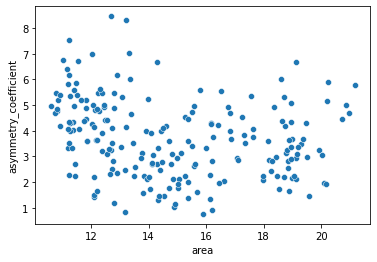

In [5]:
sns.scatterplot(x = 'area', y = 'asymmetry_coefficient', data = seeds_df)
plt.show()

C:\Users\eklav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='perimeter'>

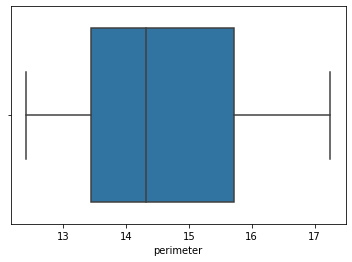

In [6]:
sns.boxplot(seeds_df['perimeter'])

### Scaling of Data

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
seeds_df_sc = sc.fit_transform(seeds_df)

#### Find out the optimum number of clusters

In [9]:
## Withing Cluster Sum of Square(WCSS) Vs Number of cluster

In [10]:
from sklearn.cluster import KMeans
no_of_clusters = range(1,8)
wcss = []

for k in no_of_clusters:
    # Create a Kmeansinstance with k clusters
    model = KMeans(n_clusters= k, random_state =1)
    
    model.fit(seeds_df_sc)
    
    
    wcss.append(model.inertia_)
    

In [11]:
wcss

[1469.999999999999,
 659.171754487041,
 430.6589731513006,
 371.65314399951626,
 327.50384374385527,
 289.5760810004942,
 262.3780354026642]

#### Plot a graph between WCSS and no of clusters

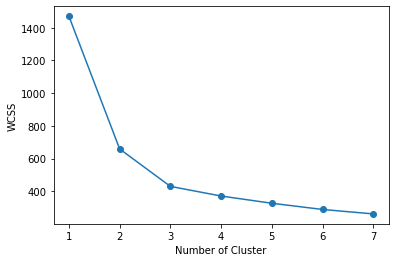

In [12]:
plt.plot(no_of_clusters, wcss, marker= 'o')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

### 2. Average Silhoutte method

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
no_of_clusters = list(range(2,8))
silhoutte_score_list = []

for k in no_of_clusters:
    model = KMeans(n_clusters=k, random_state=1)
    cluster_labels = model.fit_predict(seeds_df_sc)
    silhoutte_score_list.append(silhouette_score(seeds_df_sc,cluster_labels))

In [15]:
no_of_clusters.insert(0,1)
silhoutte_score_list.insert(0,0)

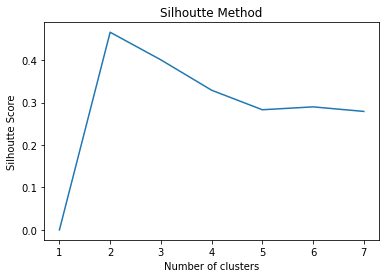

In [16]:
plt.plot(no_of_clusters, silhoutte_score_list)
plt.title('Silhoutte Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

### 3. Dendogram

In [17]:
import scipy.cluster.hierarchy as sch

Text(0.5, 1.0, 'Dendogram')

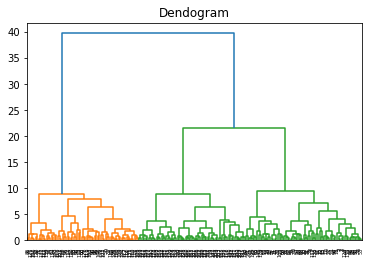

In [18]:
dendrogram = sch.dendrogram(sch.linkage(seeds_df_sc, method = 'ward'))
plt.title('Dendogram')

Lets go with 2 clusters.

## K-means Clustering

In [19]:
model = KMeans(n_clusters = 2, random_state = 1)

In [20]:
cluster_labels = model.fit_predict(seeds_df_sc)

In [21]:
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
model.cluster_centers_

array([[ 1.14065367,  1.14788697,  0.54376886,  1.1287036 ,  1.06661287,
        -0.14652535,  1.1496198 ],
       [-0.66037844, -0.66456614, -0.31481355, -0.65345998, -0.61751272,
         0.08483047, -0.66556936]])

In [23]:
seeds_df['Type'] = cluster_labels

In [24]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [25]:
seeds_df.groupby('Type').mean()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
Type,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737


In [26]:
seeds_df.loc[seeds_df['Type']==0,'Type']= "Big Seeds"
seeds_df.loc[seeds_df['Type']==1,'Type'] = "Small Seeds"

In [27]:
seeds_df['Type'].value_counts()

Small Seeds    133
Big Seeds       77
Name: Type, dtype: int64

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
model = AgglomerativeClustering(n_clusters = 2)

In [30]:
labels_new = model.fit_predict(seeds_df_sc)

In [31]:
labels_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components = 2).fit_transform(seeds_df_sc)

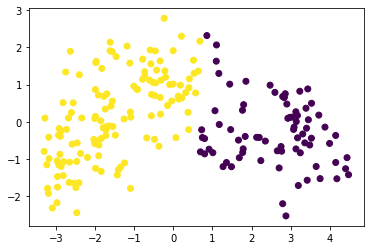

In [33]:
plt.scatter(pca_data[:,0],pca_data[:,1],c = cluster_labels)